In [104]:
!pip install factor_analyzer

In [105]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [106]:
%cd /content/gdrive/My Drive/Colab Notebooks/Classification_Bankruptcy/5조 

/content/gdrive/My Drive/Colab Notebooks/Classification_Bankruptcy/5조


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
%matplotlib inline

In [108]:
df = pd.read_csv('imputed_final.csv')
print(df.shape)

(6836, 50)


In [109]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(6836, 49) (6836,)


# 1. Scailing for Factor Analysis

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Draw Scree Plot using PCA

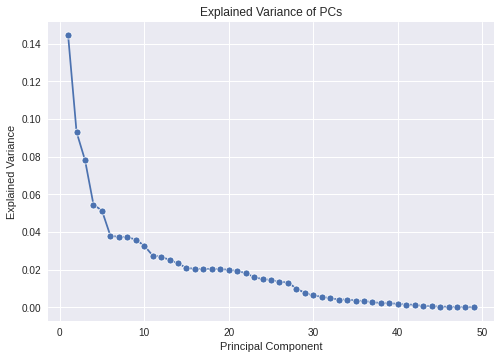

In [111]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)
plt.style.use('seaborn')
lambdas = pca.explained_variance_ratio_
sns.lineplot(x = range(1, X_scaled.shape[1]+1),y  = lambdas, marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of PCs')
plt.grid(True)
plt.show()

In [0]:
lambdas_cumsum = np.cumsum(lambdas) 

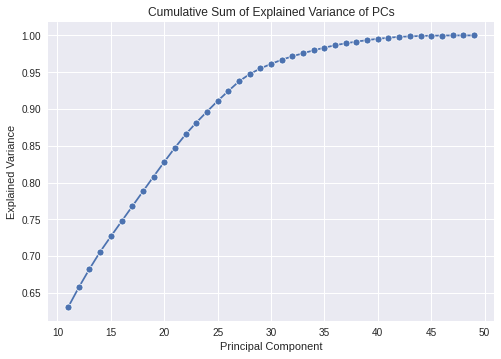

In [113]:
sns.lineplot(x = range(11, X_scaled.shape[1]+1),y  = lambdas_cumsum[10:], marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Cumulative Sum of Explained Variance of PCs')
plt.grid(True)
plt.show()

30개 정도의 PC만 사용해도 충분하다!

# 3. Draw Scree Plot using FA

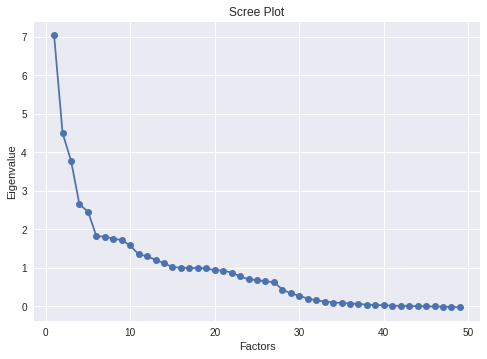

In [114]:
fa = FactorAnalyzer(n_factors = 30, rotation = 'varimax', bounds = (0, 1), method = 'principal')
fa.fit(X_scaled)
ev, v = fa.get_eigenvalues()
plt.plot(range(1,X.shape[1]+1),v, 'o-') # factor eigen values
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.style.use('seaborn')

10개 정도의 factor로 데이터를 설명할 수 있을 것 같다

# 4. Factor Analysis

In [0]:
fa_df = pd.DataFrame(np.round(fa.loadings_.T, 3), columns = X.columns)
index = ['Loading'+str(i) for i in range(1, fa_df.shape[0]+1)]
fa_df.index = index

In [116]:
fa_df.head(10)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr16,Attr18,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr29,Attr30,Attr32,Attr33,Attr35,Attr36,Attr38,Attr39,Attr40,Attr43,Attr45,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr56,Attr58,Attr59,Attr60,Attr61,Attr63,Attr64
Loading1,0.982,-0.143,0.179,0.002,0.002,0.010,0.988,-0.001,0.019,0.135,0.981,-0.006,-0.058,0.988,0.024,0.335,0.003,0.768,0.001,0.044,0.123,0.027,0.037,0.048,-0.003,-0.008,0.023,0.583,0.080,0.092,0.001,-0.001,-0.003,0.023,0.004,0.572,0.002,0.017,-0.181,-0.007,0.026,0.013,0.040,-0.026,-0.003,-0.001,-0.001,-0.013,0.021
Loading2,0.120,-0.964,0.492,0.044,0.012,0.181,0.119,0.020,-0.042,0.972,0.100,0.001,0.043,0.119,0.001,0.036,0.002,0.105,0.002,-0.126,0.926,0.001,0.006,0.139,-0.165,-0.030,0.013,0.137,-0.046,0.902,0.002,0.040,-0.099,-0.013,0.004,0.086,0.002,0.038,-0.554,-0.026,0.028,0.009,0.010,-0.048,0.001,0.004,0.003,0.002,-0.014
Loading3,-0.001,-0.011,0.011,0.089,0.001,-0.000,0.001,0.938,-0.002,0.010,0.051,-0.000,0.001,0.001,0.985,-0.000,-0.002,0.045,0.000,-0.000,0.003,0.984,0.001,-0.032,-0.001,-0.002,0.890,-0.006,0.003,0.016,0.000,0.371,0.006,0.002,-0.001,0.030,0.001,0.564,-0.024,-0.003,0.001,0.000,-0.001,-0.002,0.000,0.001,0.002,-0.000,-0.000
Loading4,0.009,-0.010,0.037,-0.002,0.000,-0.001,0.014,-0.002,0.006,0.009,0.016,-0.001,0.012,0.014,-0.001,0.020,-0.001,0.006,-0.001,0.000,0.002,-0.001,0.011,-0.037,0.004,-0.001,0.004,0.009,0.010,0.007,0.000,0.000,-0.001,-0.000,-0.001,0.006,-0.002,0.005,-0.012,-0.001,0.946,0.955,0.001,0.002,0.000,0.001,-0.001,-0.000,0.804
Loading5,0.004,0.009,-0.028,-0.003,-0.017,-0.003,-0.002,0.005,-0.006,-0.006,-0.000,-0.001,0.004,-0.002,0.001,-0.012,-0.001,-0.003,0.000,-0.002,-0.030,0.001,-0.002,0.015,-0.050,0.974,-0.013,-0.015,-0.016,-0.008,0.001,-0.002,0.196,0.307,0.592,-0.040,0.001,-0.002,0.034,0.974,-0.003,0.002,-0.004,0.022,-0.000,-0.023,-0.001,-0.001,-0.001
Loading6,0.013,-0.012,0.028,-0.002,0.001,0.962,0.016,0.000,0.001,0.010,0.014,-0.000,0.001,0.016,0.001,0.005,-0.002,0.006,0.000,0.968,0.035,0.001,0.000,-0.013,-0.006,-0.003,-0.003,0.012,0.002,-0.012,0.000,-0.001,-0.006,-0.001,-0.001,0.003,0.000,-0.001,-0.038,-0.002,-0.000,0.000,0.001,-0.003,-0.000,-0.000,-0.000,-0.000,-0.001
Loading7,0.050,-0.023,0.024,-0.002,0.001,0.002,0.050,0.001,0.001,0.020,0.046,-0.001,0.963,0.056,0.002,0.925,-0.000,0.027,0.000,0.003,0.017,0.002,0.002,-0.030,-0.040,-0.004,-0.004,0.033,-0.007,0.013,0.000,-0.001,-0.040,-0.009,-0.000,0.030,0.000,-0.001,-0.043,-0.002,0.049,-0.017,-0.093,-0.015,-0.000,0.000,-0.000,-0.001,-0.011
Loading8,-0.005,0.066,-0.119,0.028,-0.008,0.000,-0.005,0.015,-0.008,-0.051,-0.009,-0.000,-0.112,-0.005,-0.003,0.048,-0.002,0.010,0.001,-0.010,0.001,-0.003,0.000,-0.005,0.830,0.073,-0.006,0.032,-0.019,-0.072,0.000,0.001,0.916,0.050,-0.041,-0.008,-0.000,0.004,0.183,0.074,0.007,-0.003,-0.138,0.156,-0.000,-0.001,-0.000,0.000,-0.007
Loading9,-0.000,-0.001,-0.002,0.001,0.000,-0.000,0.000,0.000,0.001,0.001,0.001,0.031,0.000,0.000,-0.000,0.000,0.000,0.003,0.959,0.001,-0.002,-0.000,-0.001,0.001,0.001,0.001,0.001,0.003,-0.002,0.003,0.102,0.000,0.000,0.000,0.000,-0.001,0.827,0.001,-0.006,0.000,-0.001,-0.000,-0.000,0.000,0.000,0.001,0.000,-0.002,-0.001
Loading10,0.002,-0.011,0.049,0.127,0.009,-0.006,0.002,0.171,-0.006,0.026,0.004,-0.001,-0.002,0.002,0.055,0.001,-0.001,0.002,0.001,0.004,-0.001,0.056,0.001,-0.044,0.009,-0.001,0.180,0.001,-0.005,0.017,0.000,0.872,-0.003,0.004,-0.003,0.009,0.000,0.772,-0.018,-0.001,0.004,0.001,0.001,0.006,0.001,0.001,0.077,-0.001,-0.003


In [0]:
columns = ['net profit / total assets',
'total liabilities / total assets',
'working capital / total assets',
'current assets / short-term liabilities',
'[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
'retained earnings / total assets',
'EBIT / total assets',
'book value of equity / total liabilities',
'sales / total assets',
'equity / total assets',
'(gross profit + extraordinary items + financial expenses) / total assets',
'gross profit / short-term liabilities',
'(gross profit + depreciation) / sales',
'(gross profit + interest) / total assets',
'(total liabilities * 365) / (gross profit + depreciation)',
'(gross profit + depreciation) / total liabilities',
'total assets / total liabilities',
'gross profit / total assets',
'gross profit / sales',
'(inventory * 365) / sales',
'sales (n) / sales (n-1)',
'profit on operating activities / total assets',
'net profit / sales',
'gross profit (in 3 years) / total assets',
'(equity - share capital) / total assets',
'(net profit + depreciation) / total liabilities',
'profit on operating activities / financial expenses',
'working capital / fixed assets',
'logarithm of total assets',
'(total liabilities - cash) / sales',
'(gross profit + interest) / sales',
'(current liabilities * 365) / cost of products sold',
'operating expenses / short-term liabilities',
'operating expenses / total liabilities',
'profit on sales / total assets',
'total sales / total assets',
'(current assets - inventories) / long-term liabilities',
'constant capital / total assets',
'profit on sales / sales',
'X40 (current assets - inventory - receivables) / short-term liabilities',
'total liabilities / ((profit on operating activities + depreciation) * (12/365))',
'profit on operating activities / sales',
'rotation receivables + inventory turnover in days',
'(receivables * 365) / sales',
'net profit / inventory',
'(current assets - inventory) / short-term liabilities',
'(inventory * 365) / cost of products sold',
'EBITDA (profit on operating activities - depreciation) / total assets',
'EBITDA (profit on operating activities - depreciation) / sales',
'X50 current assets / total liabilities',
'short-term liabilities / total assets',
'(short-term liabilities * 365) / cost of products sold)',
'equity / fixed assets',
'constant capital / fixed assets',
'working capital',
'(sales - cost of products sold) / sales',
'(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)',
'total costs /total sales',
'long-term liabilities / equity',
'sales / inventory',
'sales / receivables',
'(short-term liabilities *365) / sales',
'sales / short-term liabilities',
'sales / fixed assets',
'class'    
]

In [0]:
real_columns = []
trash = {15,17,19,20,28,31,34,37,41,42,44,46,55,57,62}

for idx, col in enumerate(columns):
  if idx+1 in trash:
    continue
  else:
    real_columns.append(col)

용이한 시각화를 위해 Factor 2개만 봅시다

In [122]:
for i in range(1, 3):
  tmp = fa_df.iloc[i, :]
  top3 = list(np.argsort(-tmp.values)[:3].reshape(3,))
  bottom3 = list(np.argsort(tmp.values)[:3].reshape(3))
  print("Factor"+str(i))
  print(f"Top3 is {real_columns[top3[0]]}, {real_columns[top3[1]]}, {real_columns[top3[2]]}")
  print(f"Bottom3 is {real_columns[bottom3[0]]}, {real_columns[bottom3[1]]}, {real_columns[bottom3[2]]}")
  if i == 1:
    print("=" * 50)

Factor1
Top3 is equity / total assets, (equity - share capital) / total assets, constant capital / total assets
Bottom3 is total liabilities / total assets, short-term liabilities / total assets, (total liabilities - cash) / sales
Factor2
Top3 is (gross profit + depreciation) / total liabilities, (net profit + depreciation) / total liabilities, book value of equity / total liabilities
Bottom3 is logarithm of total assets, short-term liabilities / total assets, total liabilities / total assets


Factor1, Factor2 모두 재정 건전성(?)과 관계가 있는 것 같음

In [123]:
fa_df_top2 = pd.DataFrame(fa.fit_transform(X_scaled)[:, :2], columns=['Factor1', 'Factor2'])
fa_df_top2['class'] = y.astype(np.int)
fa_df_top2.head()

,Factor1,Factor2,class
0,-0.362842,0.356317,0
1,2.834162,-0.067040,0
2,-2.039172,0.414194,0
3,0.253466,0.321257,0
4,0.788076,0.090220,0


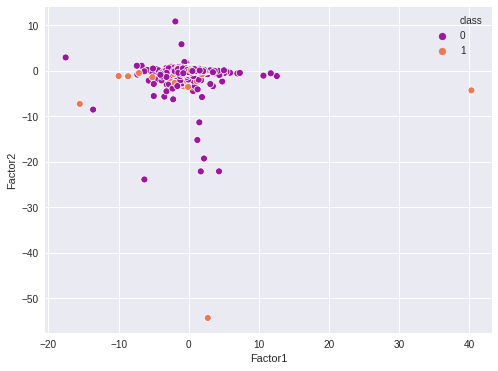

In [124]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Factor1', y='Factor2', data=fa_df_top2, hue='class', palette='plasma');

부도가 난 회사들은 대부분 Factor1의 - 부분과, Factor2의 0 부분에 위치하는 것으로 보아 재정건전성이 부족해 보인다 <br>
그 다음으로, 어떤 변수들의 정보량이 Factor에 많이 반영되었는지 알아보자.

In [125]:
top10 = np.argsort(-fa.get_communalities())[:10]

for t in top10:
  print(real_columns[t])

long-term liabilities / equity
sales (n) / sales (n-1)
sales / short-term liabilities
profit on operating activities / financial expenses
gross profit / short-term liabilities
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
sales / receivables
total costs /total sales
sales / total assets
(gross profit + interest) / total assets


Liabilites, Profit, Sales 관련된 변수들이 많이 반영되었음을 알 수 있다

In [126]:
len(real_columns)

50

In [127]:
print(real_columns)

['net profit / total assets', 'total liabilities / total assets', 'working capital / total assets', 'current assets / short-term liabilities', '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365', 'retained earnings / total assets', 'EBIT / total assets', 'book value of equity / total liabilities', 'sales / total assets', 'equity / total assets', '(gross profit + extraordinary items + financial expenses) / total assets', 'gross profit / short-term liabilities', '(gross profit + depreciation) / sales', '(gross profit + interest) / total assets', '(gross profit + depreciation) / total liabilities', 'gross profit / total assets', 'sales (n) / sales (n-1)', 'profit on operating activities / total assets', 'net profit / sales', 'gross profit (in 3 years) / total assets', '(equity - share capital) / total assets', '(net profit + depreciation) / total liabilities', 'profit on operating activities / financial expenses', 'logarith